# Classification algorithms on white wine dataset

## Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import accuracy_score, recall_score, f1_score
from sklearn.model_selection import KFold

## Preparing data

In [2]:
data = pd.read_csv('winequality-white.csv', delimiter=';')
X = data.iloc[:,:11]
y = data.iloc[:,11]

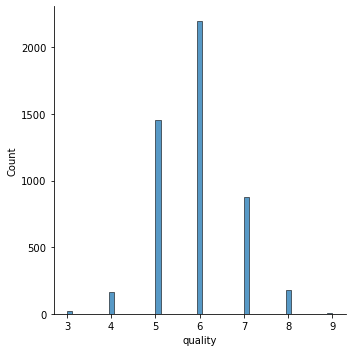

In [3]:
dist_plt = sns.displot(y)

In [4]:
#splitting the data into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)
#10-fold
cv = KFold(n_splits=10, shuffle=True)

#Scaling
scaler = StandardScaler()
scaler.fit(X)

X = scaler.transform(X)

## Cross-validation - picking the right classifier

In [5]:
def getAverage(lst):
    return sum(lst) / len(lst)
    
lstSVC = cross_val_score(SVC(), X, y, cv=cv)
lstRF = cross_val_score(RandomForestClassifier(), X, y, cv=cv)
lstKN = cross_val_score(KNeighborsClassifier(), X, y, cv=cv)

print('accuracy of SVC: ', lstSVC)
print('avg: ', getAverage(lstSVC))
print('accuracy of RF', lstRF)
print('avg: ', getAverage(lstRF))
print('accuracy of KN', lstKN)
print('avg: ', getAverage(lstKN))

accuracy of SVC:  [0.58571429 0.56326531 0.6122449  0.56938776 0.58367347 0.60204082
 0.56530612 0.56938776 0.55828221 0.5603272 ]
avg:  0.5769629815116231
accuracy of RF [0.70204082 0.70816327 0.73469388 0.69387755 0.71836735 0.71020408
 0.70204082 0.6877551  0.67893661 0.6809816 ]
avg:  0.7017061057551854
accuracy of KN [0.55714286 0.55510204 0.54897959 0.59183673 0.53265306 0.61020408
 0.54693878 0.56734694 0.55828221 0.57464213]
avg:  0.5643128417010976


## KNN Algorithm

In [ ]:
results = []

# Calculating accuracy for n_neighbors values in [10, 100]
for i in range(10, 100):
    knn = KNeighborsClassifier(n_neighbors=i, weights='distance')
    accuracy = np.mean(cross_val_score(knn, X, y, cv=cv))
    results.append(accuracy)                        

In [ ]:
plt.plot(range(10, 100), results, color='red', linestyle='solid', marker='o', markersize=10)
plt.xlabel('K Value')
plt.ylabel('Accuracy')

In [ ]:
max(results)

## Random Forest Algorithm

In [ ]:
n_estimators_list = [150,250, 350]
min_samples_split_list = [2,5,10]
min_samples_leaf_list = [1,2,4]

results = []

for n_estimators in n_estimators_list:
    for min_samples_split in min_samples_split_list:
        for min_samples_leaf in min_samples_leaf_list:
            rf_classifier = RandomForestClassifier(
                n_estimators=n_estimators,
                min_samples_split=min_samples_split,
                min_samples_leaf=min_samples_leaf,
                )
            accuracy = np.mean(cross_val_score(rf_classifier, X, y, cv=cv))
            results.append([accuracy, n_estimators, min_samples_split, min_samples_leaf])                        
results = pd.DataFrame(results)
results.columns = ['accuracy', 'n_estimators', 'min_samples_split', 'min_samples_leaf']
pd.DataFrame(results)

In [ ]:
results[results['accuracy'] == results['accuracy'].max()]

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=250, min_samples_split=2, min_samples_leaf = 1)
rf_classifier.fit(X_train, y_train)
rf_pred = rf_classifier.predict(X_test)
print('accuracy: ', np.mean(rf_pred == y_test))

## Support Vector Machines

In [8]:
#implementing SVM with three different kernels
kernels = ['linear','poly','rbf','sigmoid']
results = []
for k in kernels:
    sv_classifier = SVC(kernel=k, gamma=g, C = c)
    accuracy = np.mean(cross_val_score(sv_classifier, X, y, cv=cv)) 
    results.append([accuracy, k])
results = pd.DataFrame(results)
results.columns = ['accuracy', 'kernel']
pd.DataFrame(results)

,accuracy,kernel
0,0.520424,linear
1,0.539411,poly
2,0.602288,rbf
3,0.417105,sigmoid


In [10]:
#implementing SVM with three different gamma values
gammas = [0.1, 1,10,100]
#cs = [0.1, 1,10,100]
results = []
for g in gammas:
    sv_classifier = SVC(kernel='rbf', gamma=g)
    accuracy = np.mean(cross_val_score(sv_classifier, X, y, cv=cv)) 
    results.append([accuracy, g])
results = pd.DataFrame(results)
results.columns = ['accuracy', 'gammas']
pd.DataFrame(results)

,accuracy,gammas
0,0.575334,0.1
1,0.659863,1.0
2,0.647207,10.0
3,0.631489,100.0


In [14]:
#implementing SVM with three different C values
cs = [0.1, 1,10,100]
results = []
for c in cs:
    sv_classifier = SVC(kernel='rbf', gamma=1, C=c)
    accuracy = np.mean(cross_val_score(sv_classifier, X, y, cv=cv)) 
    results.append([accuracy, c])
results = pd.DataFrame(results)
results.columns = ['accuracy', 'C']
pd.DataFrame(results)

,accuracy,C
0,0.456918,0.1
1,0.660273,1.0
2,0.675178,10.0
3,0.673738,100.0


In [16]:
sv_classifier = SVC(kernel='rbf', gamma=1, C=10)
sv_classifier.fit(X_train, y_train)
sv_pred = sv_classifier.predict(X_test)
print('accuracy: ', np.mean(sv_pred == y_test))

accuracy:  0.6408163265306123
